In [1]:
# Import necessary libraries and methods
import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load training baseline and scaled datasets
data_path = "../data/preprocessed/preprocessed_data_20250720_131842"

X_train_base = pd.read_csv(os.path.join(data_path, 'X_train_baseline.csv'))
y_train_base = pd.read_csv(os.path.join(data_path, 'y_train_baseline.csv'))

X_train_scaled = pd.read_csv(os.path.join(data_path, 'X_train_scaled.csv'))
y_train_scaled = pd.read_csv(os.path.join(data_path, 'y_train_scaled.csv'))

# Load baseline and scaled test datasets
X_test_base = pd.read_csv(os.path.join(data_path, 'X_test_baseline.csv'))
y_test_base = pd.read_csv(os.path.join(data_path, 'y_test_baseline.csv'))

X_test_scaled = pd.read_csv(os.path.join(data_path, 'X_test_scaled.csv'))
y_test_scaled = pd.read_csv(os.path.join(data_path, 'y_test_scaled.csv'))

In [3]:
# Flatten y_train and y_test to be (n_samples, )
y_train_base_reshaped = np.ravel(y_train_base) 
y_test_base_reshaped = np.ravel(y_test_base)

y_train_sc_reshaped = np.ravel(y_train_scaled) 
y_test_sc_reshaped = np.ravel(y_test_scaled)

print(y_train_base_reshaped.shape)
print(y_train_sc_reshaped.shape)
print(y_test_base_reshaped.shape)
print(y_test_sc_reshaped.shape)

(1688,)
(1688,)
(423,)
(423,)


### Testing Baseline Model with DecisionTree and Baseline Dataset

In [5]:
# Baseline model with DecisionTree and baseline datasets
dt = DecisionTreeClassifier()
dt.fit(X_train_base, y_train_base_reshaped)

# Evaluate the best model on the test set
y_pred_dt_base = dt.predict(X_test_base)
train_acc_dt_base = accuracy_score(y_train_base_reshaped, dt.predict(X_train_base))
test_acc_dt_base = accuracy_score(y_test_base_reshaped, y_pred_dt_base)

print(f"DT Baseline Train Accuracy: {train_acc_dt_base:.4f}")
print(f"DT Baseline Test Accuracy: {test_acc_dt_base:.4f}")

print("\nDT Baseline Test Set Classification Report:")
print(classification_report(y_test_base, y_pred_dt_base))

DT Baseline Train Accuracy: 1.0000
DT Baseline Test Accuracy: 0.9054

DT Baseline Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90        54
           1       0.77      0.86      0.81        58
           2       0.91      0.90      0.91        70
           3       0.97      0.95      0.96        60
           4       1.00      0.98      0.99        65
           5       0.85      0.88      0.86        58
           6       0.88      0.91      0.90        58

    accuracy                           0.91       423
   macro avg       0.91      0.90      0.90       423
weighted avg       0.91      0.91      0.91       423



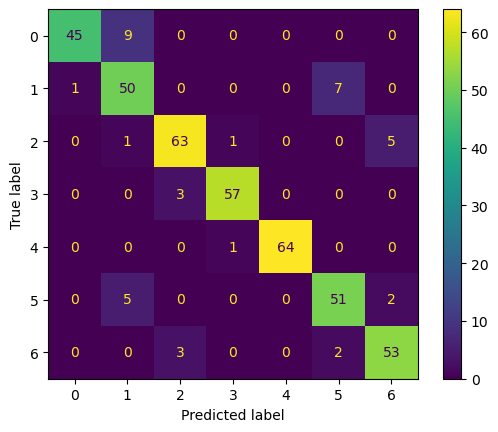

In [6]:
# DecisionTree confusion matrix
cm_dt_base = confusion_matrix(y_test_base_reshaped, y_pred_dt_base)
ConfusionMatrixDisplay(confusion_matrix = cm_dt_base).plot();

### Testing Baseline Model with DecisionTree and Scaled Dataset

In [7]:
# Baseline model with DecisionTree and scaled datasets
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train_sc_reshaped)

# Evaluate the best model on the test set
y_pred_dt_sc = dt.predict(X_test_scaled)
train_acc_dt_sc = accuracy_score(y_train_sc_reshaped, dt.predict(X_train_scaled))
test_acc_dt_sc = accuracy_score(y_test_sc_reshaped, y_pred_dt_sc)

print(f"DT Scaled Train Accuracy: {train_acc_dt_sc:.4f}")
print(f"DT Scaled Accuracy: {test_acc_dt_sc:.4f}")

print("\nDT Scaled Test Set Classification Report:")
print(classification_report(y_test_sc_reshaped, y_pred_dt_sc))

DT Scaled Train Accuracy: 1.0000
DT Scaled Accuracy: 0.9149

DT Scaled Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90        54
           1       0.77      0.86      0.81        58
           2       0.93      0.91      0.92        70
           3       0.95      0.98      0.97        60
           4       1.00      0.98      0.99        65
           5       0.87      0.90      0.88        58
           6       0.93      0.91      0.92        58

    accuracy                           0.91       423
   macro avg       0.92      0.91      0.91       423
weighted avg       0.92      0.91      0.92       423



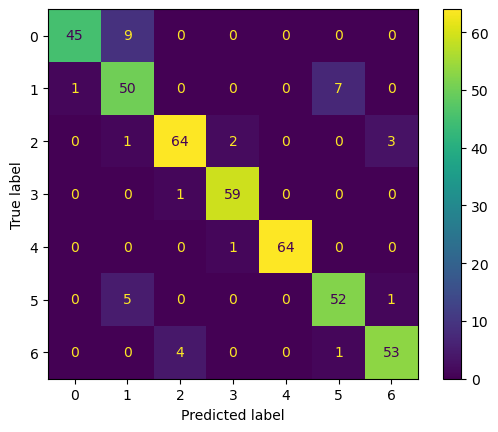

In [8]:
# DecisionTree confusion matrix
cm_dt_sc = confusion_matrix(y_test_sc_reshaped, y_pred_dt_sc)
ConfusionMatrixDisplay(confusion_matrix = cm_dt_sc).plot();